Before training, we need to clean and organize the datasets, Since we will be using two different datasets hence preprocessing of the datasets will be done twice.

In [2]:
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive')
directory_path = "/content/drive/MyDrive/Risk Scoring for heart attack/"
print(os.listdir(directory_path))

Mounted at /content/drive
['dataset_1', 'dataset_2']


In [58]:
data_1 = pd.read_csv("/content/drive/MyDrive/Risk Scoring for heart attack/dataset_1/heart_data.csv")

# Preprocessing of data_1

In [5]:
data_1

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [6]:
data_1.isnull().sum()

,0
index,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0


In [7]:
data_1.describe()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,34999.500000,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,20207.403759,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17499.750000,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,34999.500000,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,52499.250000,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,69999.000000,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        70000 non-null  int64  
 1   id           70000 non-null  int64  
 2   age          70000 non-null  int64  
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


In [9]:
# Count of each class
print(data_1['cardio'].value_counts())

# Percentage of each class
print(data_1['cardio'].value_counts(normalize=True))

cardio
0    35021
1    34979
Name: count, dtype: int64
cardio
0    0.5003
1    0.4997
Name: proportion, dtype: float64


Target variable (cardio) is perfectly balanced. Hence, no need for special handling of class imbalance.

In [22]:
categorical_cols = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

for col in categorical_cols:
    print(f"Column: {col}")
    print(data_1[col].value_counts())
    print(data_1[col].value_counts(normalize=True))
    print("-"*30)

Column: gender
gender
1    45530
2    24470
Name: count, dtype: int64
gender
1    0.650429
2    0.349571
Name: proportion, dtype: float64
------------------------------
Column: cholesterol
cholesterol
1    52385
2     9549
3     8066
Name: count, dtype: int64
cholesterol
1    0.748357
2    0.136414
3    0.115229
Name: proportion, dtype: float64
------------------------------
Column: gluc
gluc
1    59479
3     5331
2     5190
Name: count, dtype: int64
gluc
1    0.849700
3    0.076157
2    0.074143
Name: proportion, dtype: float64
------------------------------
Column: smoke
smoke
0    63831
1     6169
Name: count, dtype: int64
smoke
0    0.911871
1    0.088129
Name: proportion, dtype: float64
------------------------------
Column: alco
alco
0    66236
1     3764
Name: count, dtype: int64
alco
0    0.946229
1    0.053771
Name: proportion, dtype: float64
------------------------------
Column: active
active
1    56261
0    13739
Name: count, dtype: int64
active
1    0.803729
0    0.196271


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'height'}>],
       [<Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'ap_hi'}>],
       [<Axes: title={'center': 'ap_lo'}>, <Axes: >]], dtype=object)

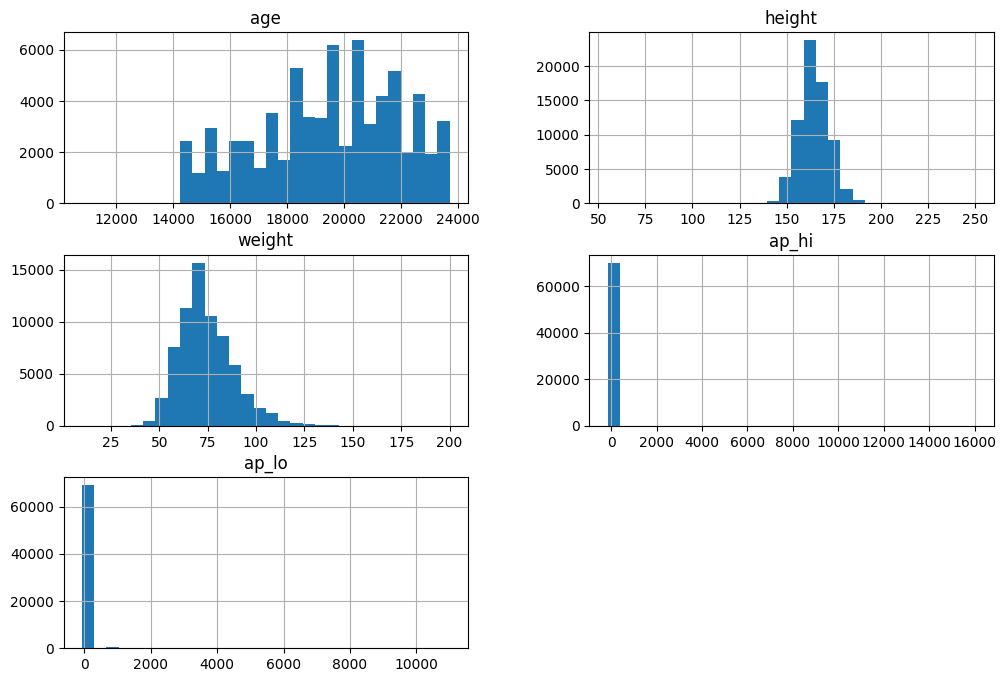

In [23]:
numeric_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

data_1[numeric_cols].describe()
data_1[numeric_cols].hist(bins=30, figsize=(12,8))


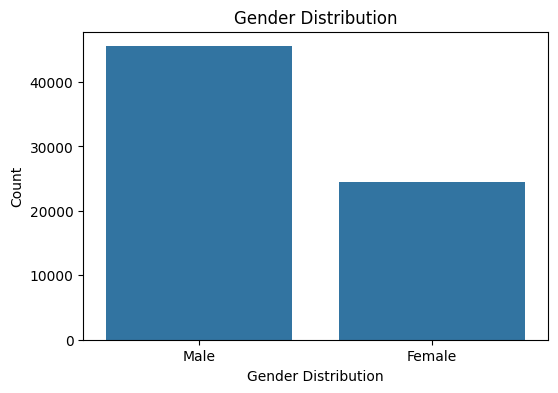

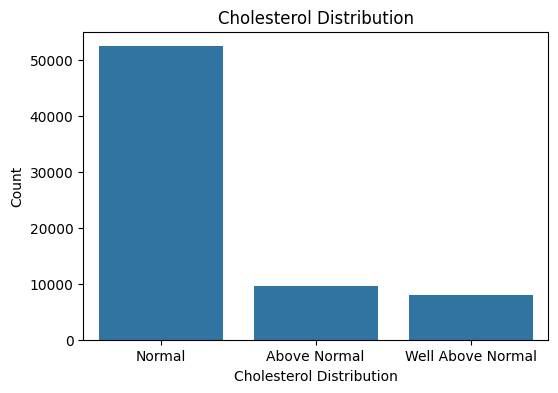

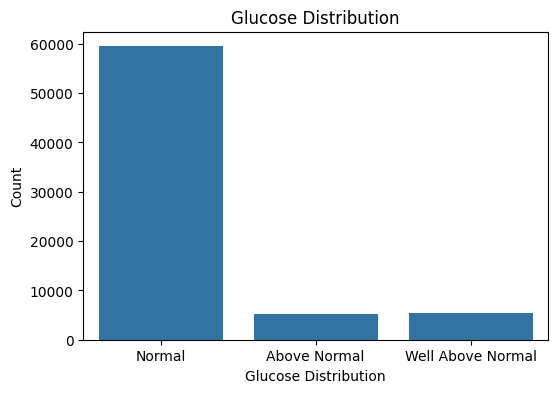

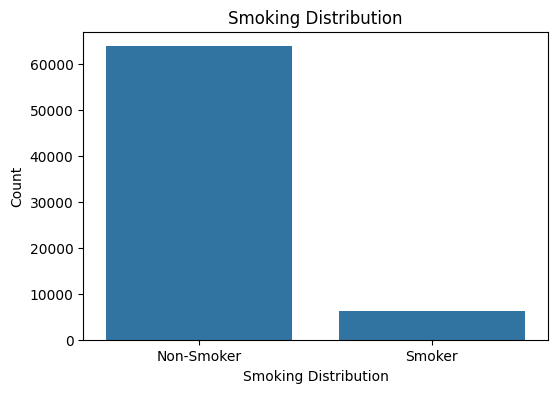

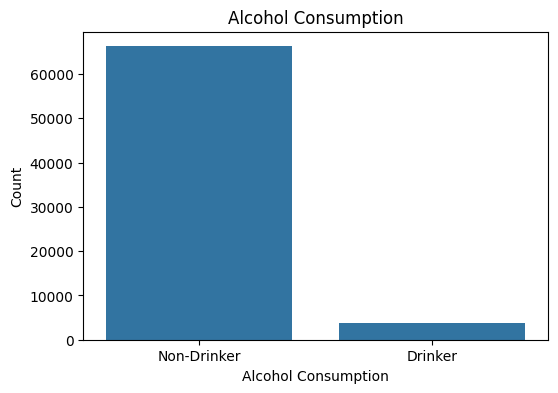

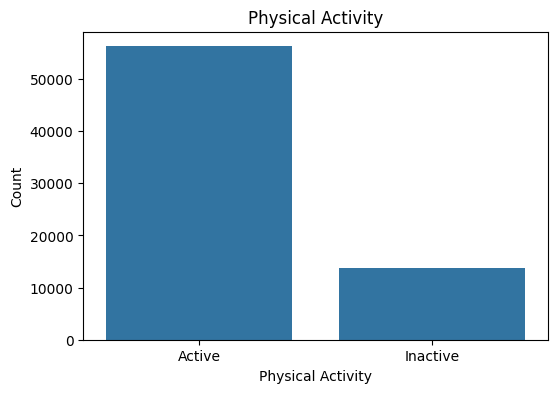

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting function
def plot_bar(counts, labels, title):
    plt.figure(figsize=(6,4))
    sns.barplot(x=labels, y=counts)
    plt.title(title)
    plt.ylabel("Count")
    plt.xlabel(title)
    plt.show()

# Gender
plot_bar([45530, 24470], ['Male', 'Female'], 'Gender Distribution')

# Cholesterol
plot_bar([52385, 9549, 8066], ['Normal', 'Above Normal', 'Well Above Normal'], 'Cholesterol Distribution')

# Glucose
plot_bar([59479, 5190, 5331], ['Normal', 'Above Normal', 'Well Above Normal'], 'Glucose Distribution')

# Smoke
plot_bar([63831, 6169], ['Non-Smoker', 'Smoker'], 'Smoking Distribution')

# Alcohol
plot_bar([66236, 3764], ['Non-Drinker', 'Drinker'], 'Alcohol Consumption')

# Active
plot_bar([56261, 13739], ['Active', 'Inactive'], 'Physical Activity')


Imbalanced Classes:
Variables like smoke (9% smokers), alco (5% drinkers), or gender (65% male) are highly skewed. A model may ignore minority classes and predict majority classes more often.

Risk factors like smoking, high cholesterol, or inactivity tend to correlate with cardio, so imbalance in features usually introduces bias in predictions.

In [26]:
# Check cardio proportion across each category
for col in ['gender','smoke','alco','active','cholesterol','gluc']:
    print(pd.crosstab(data_1[col], data_1['cardio'], normalize='index'))

cardio         0         1
gender                    
1       0.503273  0.496727
2       0.494769  0.505231
cardio         0         1
smoke                     
0       0.497893  0.502107
1       0.525207  0.474793
cardio         0         1
alco                      
0       0.499426  0.500574
1       0.515675  0.484325
cardio         0         1
active                    
0       0.464226  0.535774
1       0.509109  0.490891
cardio              0         1
cholesterol                    
1            0.559893  0.440107
2            0.397843  0.602157
3            0.234565  0.765435
cardio         0         1
gluc                      
1       0.519410  0.480590
2       0.406936  0.593064
3       0.377978  0.622022


Low-risk categorical features (gender, smoke, alcohol):

Gender is balanced.

Smoke/alco have very few samples by which the model may underperform for these subgroups

High-risk categorical features (cholesterol, glucose, active):

Overall risk of bias:

The model is likely to underestimate risk for minority categories (smokers, drinkers, inactive) because there are few examples.

Features like cholesterol and glucose are well represented across risk levels → the model will learn these well.

In [35]:
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import numpy as np

Explained Variance Ratio: [0.17911637 0.13337017 0.1161662  0.07855145 0.07064822]
Cumulative Explained Variance: 0.5778524039276192

PCA Result (first few rows):
        PC1       PC2       PC3       PC4       PC5
0  1.422913 -2.492062 -1.371283 -0.251445 -0.708607
1 -1.298943 -2.362882  2.080912  0.192798  0.224806
2 -1.126377 -2.396773  1.482780 -0.191700 -0.298083
3  1.786070 -2.453664 -0.159223 -1.095653  0.001654
4 -1.640123 -2.509190 -1.442617  0.162524 -0.406408

Feature Contributions to PCs:
        index        id       age    height    weight     ap_hi     ap_lo  \
PC1  0.001669  0.001667 -0.042593  0.417726  0.195410  0.008616  0.018866   
PC2  0.706538  0.706538  0.015486 -0.005358  0.005364  0.006932 -0.001037   
PC3 -0.026773 -0.026776  0.353689 -0.011481  0.306683  0.081881  0.091337   
PC4 -0.000559 -0.000565 -0.195016 -0.228209 -0.228603 -0.115456 -0.107331   
PC5  0.000202  0.000203  0.313310 -0.179902 -0.023748  0.342859  0.430677   

     cholesterol      gluc     

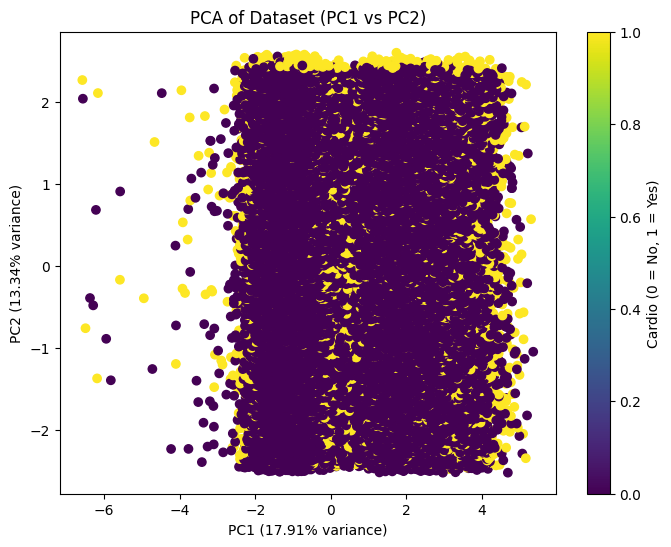

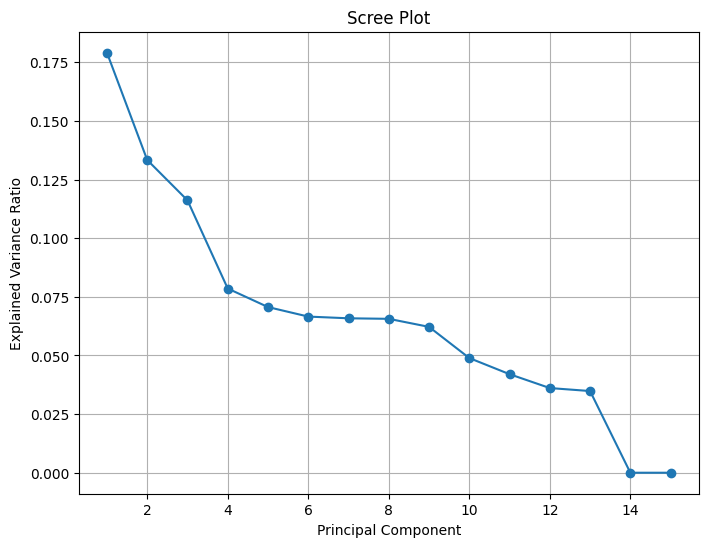

Cumulative Explained Variance: [0.17911637 0.31248653 0.42865273 0.50720418 0.5778524  0.64443943
 0.71029626 0.77592833 0.83812892 0.8870332  0.92905584 0.96516484
 0.99999995 1.         1.        ]
Number of components to explain 95% variance: 12


In [36]:
# Drop irrelevant columns
X_raw = data_1.drop(['index', 'id', 'cardio'], axis=1)
y = data_1['cardio']

# One-hot encode gender
data_1_pca = pd.get_dummies(data_1, columns=['gender'], prefix='gender')

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_raw, y)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_1_pca)

# Apply PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

# Interpret results
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Cumulative Explained Variance:", sum(pca.explained_variance_ratio_))

# Create DataFrame for PCA results
data_1_pca_result = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
print("\nPCA Result (first few rows):")
print(data_1_pca_result.head())

# Feature contributions to principal components
print("\nFeature Contributions to PCs:")
print(pd.DataFrame(pca.components_, columns=data_1_pca.columns, index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5']))

# Visualize PCA results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_1_pca_result['PC1'], data_1_pca_result['PC2'], c=data_1['cardio'], cmap='viridis')
plt.title('PCA of Dataset (PC1 vs PC2)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.colorbar(scatter, label='Cardio (0 = No, 1 = Yes)')
plt.show()

# Scree plot to visualize explained variance
pca_full = PCA().fit(X_scaled)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1), pca_full.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Determine number of components for 95% variance
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
print("Cumulative Explained Variance:", cumulative_variance)
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to explain 95% variance: {n_components}")

Increasing the number of columns to 10 to increase the variance, since highest variance can be achieved by PC=10

In [12]:
# Apply PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Interpret results
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Cumulative Explained Variance:", sum(pca.explained_variance_ratio_))

# Create DataFrame for PCA results
data_1_pca_result = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
print("\nPCA Result (first few rows):")
print(data_1_pca_result.head())

# Feature contributions to principal components
print("\nFeature Contributions to PCs:")
print(pd.DataFrame(pca.components_, columns=data_1_pca.columns, index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6', 'PC7', 'PC8', 'PC9', 'PC10']))

# Determine number of components for 95% variance
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
print("Cumulative Explained Variance:", cumulative_variance)
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to explain 95% variance: {n_components}")

Explained Variance Ratio: [0.22387758 0.13173891 0.09614023 0.08494642 0.08267223 0.08204758
 0.08021889 0.07528975 0.05266681 0.04642827]
Cumulative Explained Variance: 0.9560266743808724

PCA Result (first few rows):
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.444767 -1.103511 -0.441750 -0.341919  0.841304  0.224240  0.453758   
1 -1.311662  1.666859  0.197259  0.151340  0.424202  0.063437 -0.287382   
2 -1.136149  1.057993 -0.240465 -0.630817 -1.793030 -0.157768  0.040780   
3  1.782977 -0.765135 -0.837499  0.108298  0.657996  0.111861 -0.450746   
4 -1.617999 -1.192324  0.076972 -0.620126 -1.877865 -0.233958  0.285703   

        PC8       PC9      PC10  
0 -0.922459 -0.478593 -0.170809  
1  0.430503  0.349044 -1.729711  
2 -0.853584  0.019399 -0.846910  
3 -0.307138 -0.289020 -0.510025  
4 -1.007860 -0.004573 -0.146340  

Feature Contributions to PCs:
           age    height    weight     ap_hi     ap_lo  cholesterol      gluc  \
PC1  -0.044618

In [13]:
# Apply PCA
pca = PCA(n_components=11)
X_pca = pca.fit_transform(X_scaled)

# Interpret results
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Cumulative Explained Variance:", sum(pca.explained_variance_ratio_))

# Create DataFrame for PCA results
data_1_pca_result = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11'])
print("\nPCA Result (first few rows):")
print(data_1_pca_result.head())

# Feature contributions to principal components
print("\nFeature Contributions to PCs:")
print(pd.DataFrame(pca.components_, columns=data_1_pca.columns, index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11']))

Explained Variance Ratio: [0.22387758 0.13173891 0.09614023 0.08494642 0.08267223 0.08204758
 0.08021889 0.07528975 0.05266681 0.04642827 0.04397333]
Cumulative Explained Variance: 0.9999999999999998

PCA Result (first few rows):
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.444767 -1.103511 -0.441750 -0.341919  0.841304  0.224240  0.453758   
1 -1.311662  1.666859  0.197259  0.151340  0.424202  0.063437 -0.287382   
2 -1.136149  1.057993 -0.240465 -0.630817 -1.793030 -0.157768  0.040780   
3  1.782977 -0.765135 -0.837499  0.108298  0.657996  0.111861 -0.450746   
4 -1.617999 -1.192324  0.076972 -0.620126 -1.877865 -0.233958  0.285703   

        PC8       PC9      PC10      PC11  
0 -0.922459 -0.478593 -0.170809 -0.067528  
1  0.430503  0.349044 -1.729711  0.983234  
2 -0.853584  0.019399 -0.846910  2.068885  
3 -0.307138 -0.289020 -0.510025 -0.440286  
4 -1.007860 -0.004573 -0.146340 -0.058227  

Feature Contributions to PCs:
           age    height

In [14]:
data_1_pca = data_1_pca.rename(columns={'gender_1': 'female', 'gender_2': 'male'})

In [15]:
data_1_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   height       70000 non-null  int64  
 2   weight       70000 non-null  float64
 3   ap_hi        70000 non-null  int64  
 4   ap_lo        70000 non-null  int64  
 5   cholesterol  70000 non-null  int64  
 6   gluc         70000 non-null  int64  
 7   smoke        70000 non-null  int64  
 8   alco         70000 non-null  int64  
 9   active       70000 non-null  int64  
 10  female       70000 non-null  bool   
 11  male         70000 non-null  bool   
dtypes: bool(2), float64(1), int64(9)
memory usage: 5.5 MB


In [16]:
# Compute correlations with cardio
feature_correlations = data_1_pca.corrwith(data_1['cardio'])
print("Correlation of Original Features with Cardio:")
print(feature_correlations)

Correlation of Original Features with Cardio:
age            0.238159
height        -0.010821
weight         0.181660
ap_hi          0.054475
ap_lo          0.065719
cholesterol    0.221147
gluc           0.089307
smoke         -0.015486
alco          -0.007330
active        -0.035653
female        -0.008109
male           0.008109
dtype: float64


In [17]:
# 2. Correlation of principal components with cardio
pc_correlations = data_1_pca_result.corrwith(data_1['cardio'])
print("\nCorrelation of Principal Components with Cardio:")
print(pc_correlations)


Correlation of Principal Components with Cardio:
PC1     0.011064
PC2     0.265304
PC3    -0.081088
PC4     0.075050
PC5    -0.025220
PC6     0.002305
PC7     0.097512
PC8     0.129165
PC9     0.023384
PC10   -0.093037
PC11    0.037548
dtype: float64


PC2 (0.265): Strongest positive link with cardio → captures risk factors (cholesterol, glucose, age, weight).

PC8 (0.129): Moderate positive → weight & age, physical attributes tied to disease risk.

PC7 (0.098): Weak positive → mainly age effect (older → higher risk).

PC10 (-0.093): Weak negative → height, cholesterol, glucose interplay.

PC3 (-0.081): Weak negative → lifestyle factors (alcohol, smoking, activity) slightly reduce risk.

PC4 (0.075): Weak positive → blood pressure contributes modestly.

PC11 (0.038): Very weak positive → minor variance in cholesterol, height, glucose.

PC5 (-0.025): Very weak negative → physical activity slightly protective.

PC9 (0.023): Very weak positive → small effect of smoking & alcohol.

PC1 (0.011): Near-zero → gender, height, smoking show minimal impact.

PC6 (0.002): Near-zero → blood pressure variance not tied to cardio.

# Modelling of dataset_1

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

In [39]:
# Target and Split
from sklearn.model_selection import train_test_split

y = data_1['cardio']
X = data_1_pca_result

# Stratified split to maintain cardio distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

**Logistic Regression**

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      7004
           1       0.91      0.90      0.91      6996

    accuracy                           0.91     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.91      0.91      0.91     14000

ROC-AUC: 0.9716962560640836


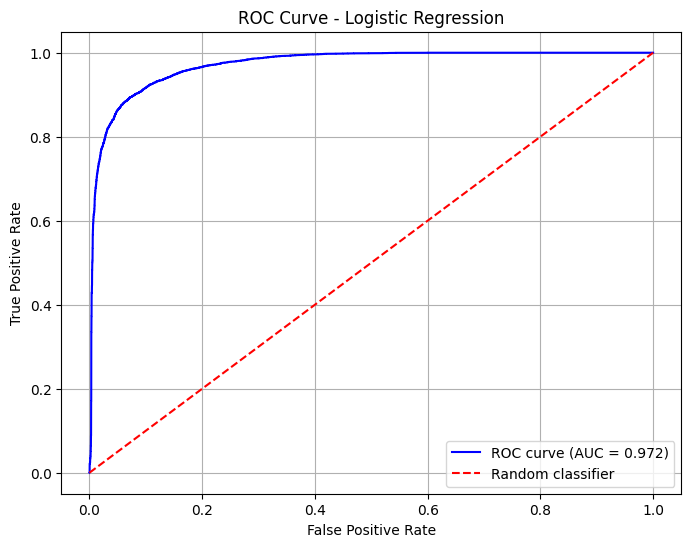

In [47]:
logreg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)
y_prob_lr = logreg.predict_proba(X_test)[:,1]

print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr)
roc_auc = roc_auc_score(y_test, y_prob_lr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random classifier')
plt.title('ROC Curve - Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**Support Vector Machine**

In [43]:
from sklearn.svm import SVC

svm = SVC(class_weight='balanced', probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test)[:,1]

print("SVM")
print(classification_report(y_test, y_pred_svm))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_svm))

SVM
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      7004
           1       0.92      0.91      0.91      6996

    accuracy                           0.91     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.91      0.91      0.91     14000

ROC-AUC: 0.9756538491930937


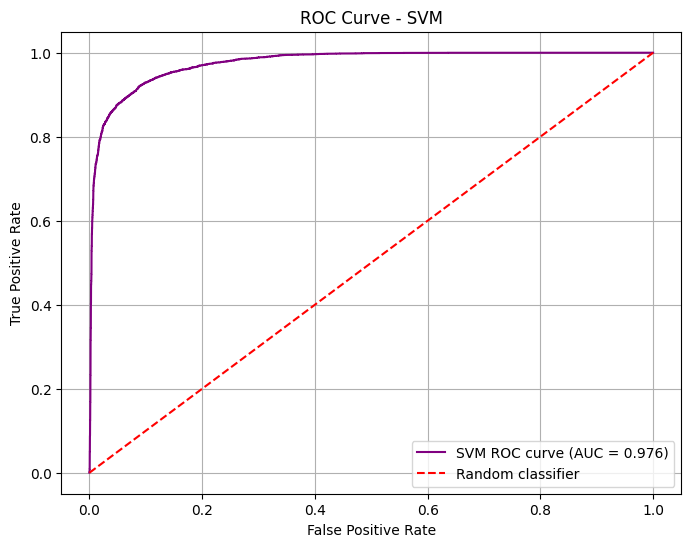

In [48]:
# Compute ROC curve for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='purple', label=f'SVM ROC curve (AUC = {roc_auc_svm:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random classifier')
plt.title('ROC Curve - SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**Random Forest Classifier**

In [49]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', n_estimators=500, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

print("Random Forest")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))

Random Forest
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      7004
           1       0.93      0.91      0.92      6996

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000

ROC-AUC: 0.9812061061081163


In [44]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', n_estimators=1000, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

print("Random Forest")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))

Random Forest
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      7004
           1       0.93      0.91      0.92      6996

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000

ROC-AUC: 0.98123963673131


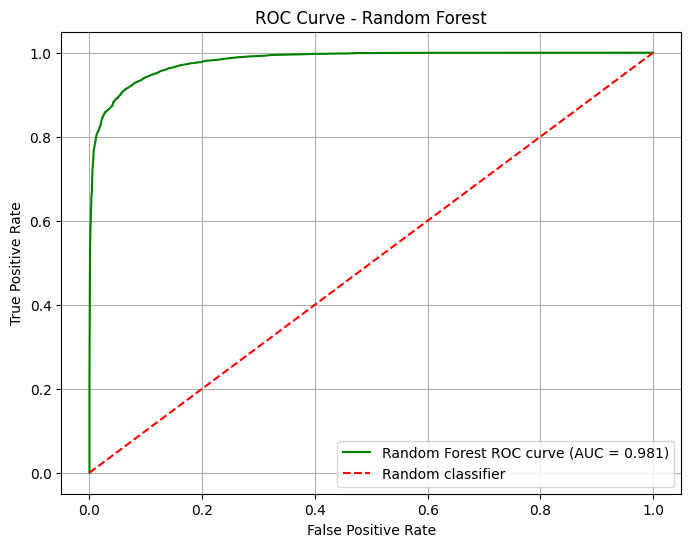

In [50]:
# Compute ROC curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='green', label=f'Random Forest ROC curve (AUC = {roc_auc_rf:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random classifier')
plt.title('ROC Curve - Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


**XGBoost**

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:30:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classifier
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      7004
           1       0.93      0.91      0.92      6996

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000

ROC-AUC: 0.979515911678665


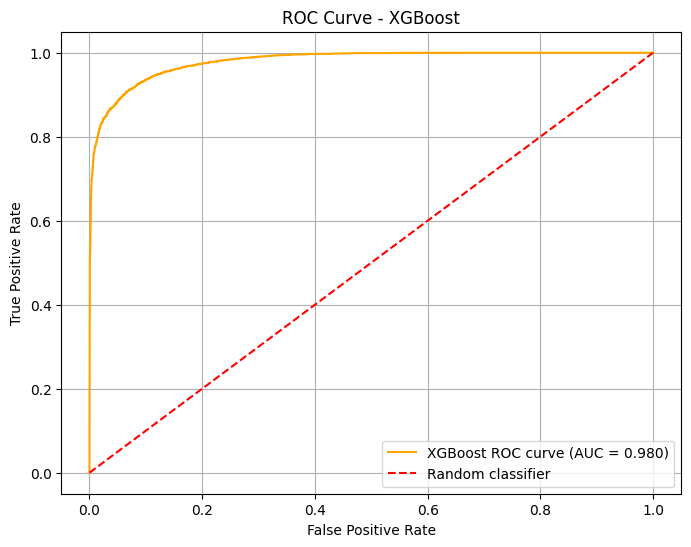

In [51]:
import xgboost as xgb

# Calculate scale_pos_weight for imbalance
scale_pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)

# Initialize XGBoost classifier
xgb_clf = xgb.XGBClassifier(
    n_estimators=500,
    max_depth=5,
    learning_rate=0.05,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Fit the model
xgb_clf.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_clf.predict(X_test)
y_prob_xgb = xgb_clf.predict_proba(X_test)[:,1]

# Classification report
print("XGBoost Classifier")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))

# ROC curve visualization
fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)
roc_auc = roc_auc_score(y_test, y_prob_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'XGBoost ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random classifier')
plt.title('ROC Curve - XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


With learning rate= 0.1

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:30:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classifier
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      7004
           1       0.93      0.91      0.92      6996

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000

ROC-AUC: 0.979662972951175


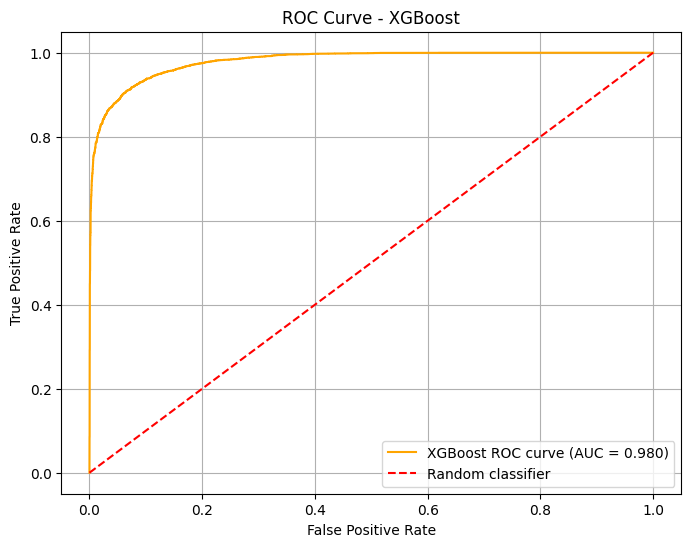

In [52]:
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Calculate scale_pos_weight for imbalance
scale_pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)

# Initialize XGBoost classifier
xgb_clf = xgb.XGBClassifier(
    n_estimators=500,
    max_depth=5,
    learning_rate=0.1,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Fit the model
xgb_clf.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_clf.predict(X_test)
y_prob_xgb = xgb_clf.predict_proba(X_test)[:,1]

# Classification report
print("XGBoost Classifier")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))

# ROC curve visualization
fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)
roc_auc = roc_auc_score(y_test, y_prob_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'XGBoost ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random classifier')
plt.title('ROC Curve - XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:31:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classifier
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      7004
           1       0.93      0.91      0.92      6996

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000

ROC-AUC: 0.9797475444073614


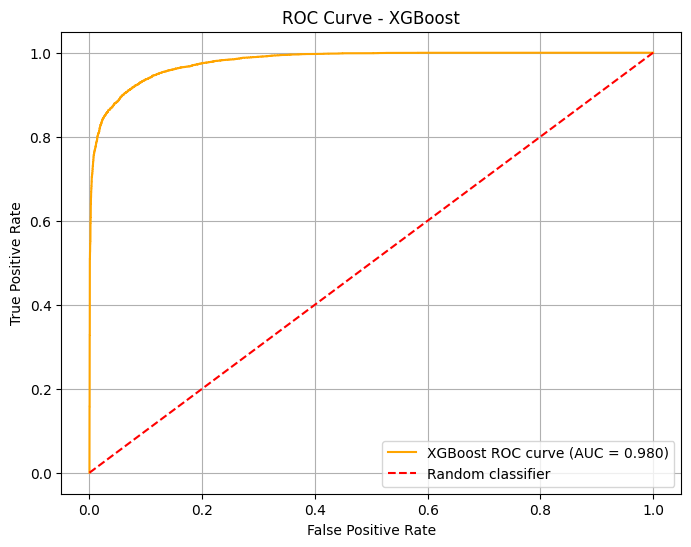

In [53]:
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Calculate scale_pos_weight for imbalance
scale_pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)

# Initialize XGBoost classifier
xgb_clf = xgb.XGBClassifier(
    n_estimators=800,
    max_depth=5,
    learning_rate=0.05,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Fit the model
xgb_clf.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_clf.predict(X_test)
y_prob_xgb = xgb_clf.predict_proba(X_test)[:,1]

# Classification report
print("XGBoost Classifier")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))

# ROC curve visualization
fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)
roc_auc = roc_auc_score(y_test, y_prob_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'XGBoost ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random classifier')
plt.title('ROC Curve - XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


**Feedforward Neural Network**

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - auc: 0.8796 - loss: 0.4647 - val_auc: 0.9725 - val_loss: 0.2230
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - auc: 0.9672 - loss: 0.2412 - val_auc: 0.9732 - val_loss: 0.2196
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - auc: 0.9703 - loss: 0.2255 - val_auc: 0.9736 - val_loss: 0.2175
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - auc: 0.9713 - loss: 0.2248 - val_auc: 0.9738 - val_loss: 0.2150
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - auc: 0.9730 - loss: 0.2138 - val_auc: 0.9740 - val_loss: 0.2137
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - auc: 0.9720 - loss: 0.2251 - val_auc: 0.9741 - val_loss: 0.2112
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - auc: 0.9719 - loss: 0.2155 - val_auc: 0.9742 - val_loss: 0.2108
Epoch 8/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - auc: 0.9730 - loss: 0.2133 - val_auc: 0.9745 - val_loss: 0.2069
Epoch 9/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - auc: 0.9729 -

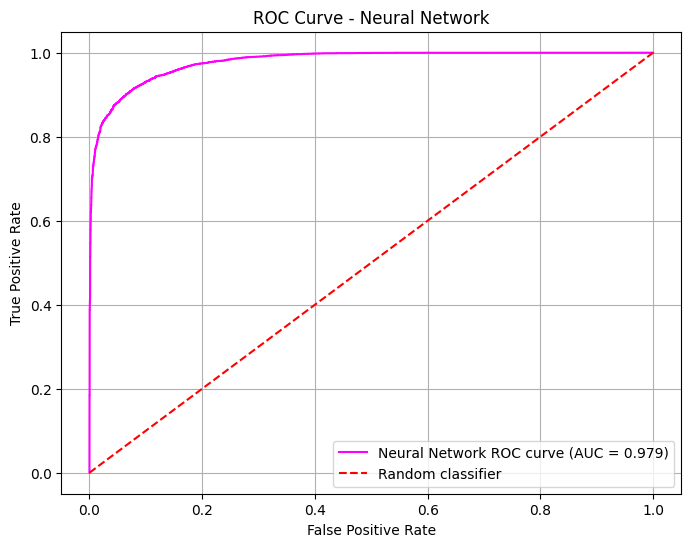

In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler

# Build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),  # prevent overfitting
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # output layer
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC(name='auc')]
)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=256,
    verbose=1
)

# Predictions
y_prob_nn = model.predict(X_test_scaled).ravel()
y_pred_nn = (y_prob_nn >= 0.5).astype(int)

from sklearn.metrics import classification_report, roc_auc_score, roc_curve
print("Neural Network Classifier")
print(classification_report(y_test, y_pred_nn))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_nn))

# ROC curve visualization
fpr, tpr, _ = roc_curve(y_test, y_prob_nn)
roc_auc = roc_auc_score(y_test, y_prob_nn)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='magenta', label=f'Neural Network ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random classifier')
plt.title('ROC Curve - Neural Network')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Increasing the number of epoch and increasing the dropout rate in the second layer and decreasing it in the first layer.
This shift may make the model less prone to overfitting early features (from the input) but more prone to overfitting later features (in the second layer). The net effect on overfitting depends on the dataset and problem complexity.

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - auc: 0.7760 - loss: 0.5397 - val_auc: 0.9726 - val_loss: 0.2257
Epoch 2/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - auc: 0.9667 - loss: 0.2412 - val_auc: 0.9733 - val_loss: 0.2207
Epoch 3/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - auc: 0.9702 - loss: 0.2284 - val_auc: 0.9736 - val_loss: 0.2187
Epoch 4/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - auc: 0.9693 - loss: 0.2303 - val_auc: 0.9739 - val_loss: 0.2156
Epoch 5/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - auc: 0.9711 - loss: 0.2217 - val_auc: 0.9740 - val_loss: 0.2133
Epoch 6/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - auc: 0.9724 - loss: 0.2162 - val_auc: 0.9743 - val_loss: 0.2100
Epoch 7/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - auc: 0.9725 - loss: 0.2151 - val_auc: 0.9745 - val_loss: 0.2070
Epoch 8/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - auc: 0.9727 - loss: 0.2158 - val_auc: 0.9747 - val_loss: 0.2045
Epoch 9/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - auc: 

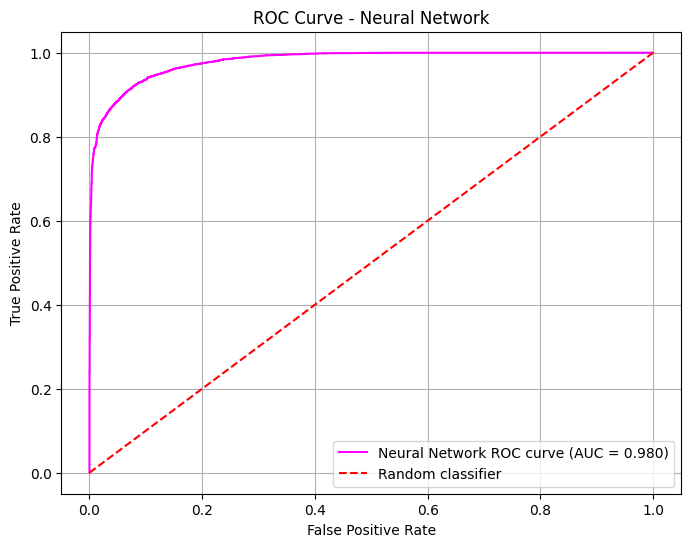

In [56]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC(name='auc')]
)

history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=256,
    verbose=1
)

y_prob_nn = model.predict(X_test_scaled).ravel()
y_pred_nn = (y_prob_nn >= 0.5).astype(int)

from sklearn.metrics import classification_report, roc_auc_score, roc_curve
print("Neural Network Classifier")
print(classification_report(y_test, y_pred_nn))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_nn))

fpr, tpr, _ = roc_curve(y_test, y_prob_nn)
roc_auc = roc_auc_score(y_test, y_prob_nn)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='magenta', label=f'Neural Network ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random classifier')
plt.title('ROC Curve - Neural Network')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Model Saving

In [59]:
import joblib
import os

# Ensure the directory exists
save_path = '/content/drive/MyDrive/Risk Scoring for heart attack'
os.makedirs(save_path, exist_ok=True)

# File path for the model
model_file = os.path.join(save_path, 'random_forest_model.pkl')

# Save the model
joblib.dump(rf, model_file)

print(f"Random Forest model saved to: {model_file}")


Random Forest model saved to: /content/drive/MyDrive/Risk Scoring for heart attack/random_forest_model.pkl
